# Web Data Analysis
## Author: Lokesh Dondapati
Github URL: https://github.com/LokeshDondapati/Web-Data-Analysis

## PART 1 XML Parsing

### Code Approach
For getting xml sitemap, check with robots.txt to see whether there is sitemap url and then etxracting the all sitemap urls in the url i chose there is one url.
From extracted sitemap url, content was extracted by identifying the required patterns and converted that in to a dataframe

### Data usage
Chatgpt, who don't know this name. It's the trending AI that almost every person is using nowadays.
The dataset generated by the Sitemap scraper consists of information extracted from XML sitemaps of a given website, specifically the "https://openai.com/" website in this case. The dataset is structured as a pandas DataFrame with columns representing different aspects of the sitemap data. Here's a brief description of the columns:

loc: URL of the page included in the sitemap.
last modified: Date and time indicating when the page was last modified, if available in the sitemap.
Url_Change_frequency: Indicates the change frequency of the URL in the sitemap.
    
This dataset could be useful for understanding the structure and content of a website, tracking changes over time

This dataset can answer about how frequently url contents being changed, and when are those being getting modified

In [1]:
# from package analysis importing file and then accessing files content
from analysis import xml2
fun=xml2.Sitemap()
#this imported function gives dataframe
fun.run()

,loc,last modified,Url_Change_frequency
0,https://openai.com/research/dall-e-3-system-card,[2023-11-17T20:49:08.239Z],[daily]
1,https://openai.com/research/gpt-4v-system-card,[2023-11-17T20:49:08.239Z],[daily]
2,https://openai.com/research/confidence-buildin...,[2023-11-17T20:49:08.239Z],[daily]
3,https://openai.com/research/frontier-ai-regula...,[2023-11-17T20:49:08.239Z],[daily]
4,https://openai.com/research/improving-mathemat...,[2023-11-17T20:49:08.239Z],[daily]
...,...,...,...
468,https://openai.com/pt/policies/eu-terms-of-use,[2023-11-17T20:49:08.239Z],[daily]
469,https://openai.com/es/policies,[2023-11-17T20:49:08.239Z],[daily]
470,https://openai.com/es/policies/eu-terms-of-use,[2023-11-17T20:49:08.239Z],[daily]
471,https://openai.com/pl/policies,[2023-11-17T20:49:08.239Z],[daily]


## PART 2  Using an API

### Code Approach:

The "API" class is initialized with a base URL for making API requests. The default base URL is set to a ServiceNow instance with incident-related parameters.

The "api_response" method makes an API request to the specified ServiceNow URL, authenticating with a username and password. The response, containing incident data, is parsed as JSON and converted into a DataFrame using the json_normalize function from the pandas library.

The "columns_orderby" method calls "api_response" to get incident data. It performs data cleaning by dropping columns with all null values and selects specific columns of interest for further analysis. The method prints the first rows, info, and description of the selected columns. The cleaned DataFrame is then returned.

The "ticket_status_analysis" method calls "api_response" to obtain incident data. It analyzes the distribution of ticket states (or priorities) and visualizes the results using a bar chart. The x-axis labels are customized for better readability.

The "contacted_for_incident_analysis" method calls "api_response" to get incident data. It analyzes the distribution of incident contact types and visualizes the results using a pie chart.

The "priority_analysis" method calls "api_response" to obtain incident data. It creates a pivot table to count occurrences of each priority for each root cause (category) and visualizes the results using a stacked bar chart.

Finally, an instance of the "API" class is created (named "joke_api" in this example), and various methods are called to showcase the functionality, such as obtaining incident data and performing different analyses.

It's important to note that this script interacts with a specific API (ServiceNow) and is tailored for managing incident tickets. The methods provide insights into the distribution and analysis of incident data, making it a valuable tool for monitoring and understanding ticket-related information.







### Dataset Usage
The dataset utilized in this script is obtained from the ServiceNow API, specifically focusing on incident-related information. Each incident ticket in the dataset contains various attributes

This dataset answers some of below questions:

Ticket Status Analysis: The "ticket_status_analysis" method provides insights into the distribution of ticket states or priorities. This analysis can be valuable for understanding the current status of incidents, identifying trends, and prioritizing actions accordingly.

Contact Analysis: The "contacted_for_incident_analysis" method analyzes the distribution of incident contact types, offering insights into how incidents are reported or initiated. This information can be useful for optimizing communication channels and support processes.

Priority Analysis: The "priority_analysis" method creates a pivot table to count occurrences of each priority for each root cause (category). This analysis helps in understanding the distribution of priorities across different incident categories, aiding in resource allocation and decision-making.

In [2]:
from analysis import servicenow_api
class_api = servicenow_api.API()

#Api response converted to dataframe
jokes_df = class_api.api_response()
class_api.columns_orderby()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   number             68 non-null     object
 1   impact             68 non-null     object
 2   contact_type       68 non-null     object
 3   sys_created_by     68 non-null     object
 4   opened_at          68 non-null     object
 5   priority           68 non-null     object
 6   impact             68 non-null     object
 7   urgency            68 non-null     object
 8   assigned_to        19 non-null     object
 9   resolved_at        68 non-null     object
 10  closed_at          68 non-null     object
 11  short_description  68 non-null     object
 12  close_code         68 non-null     object
 13  subcategory        68 non-null     object
 14  escalation         68 non-null     object
 15  category           68 non-null     object
 16  resolved_by        40 non-null     object
 17 

,number,impact,contact_type,sys_created_by,opened_at,priority,impact,urgency,assigned_to,resolved_at,closed_at,short_description,close_code,subcategory,escalation,category,resolved_by,reopen_count
0,INC0000060,2,self-service,employee,2016-12-12 15:19:57,3,2,2,NaN,2016-12-13 21:43:14,2016-12-14 02:46:44,Unable to connect to email,Solved (Permanently),email,0,inquiry,NaN,0
1,INC0009002,2,,admin,2018-09-16 12:49:23,3,2,2,,2018-09-16 12:51:17,2018-12-10 03:29:08,My computer is not detecting the headphone device,Solved (Permanently),,0,Hardware,NaN,0
2,INC0000009,1,phone,don.goodliffe,2023-07-16 22:50:23,1,1,1,NaN,2023-10-09 19:56:12,2023-07-17 22:55:16,Reset my password,Closed/Resolved by Caller,,0,inquiry,NaN,
3,INC0000010,2,phone,don.goodliffe,2023-07-10 22:53:02,4,2,3,NaN,2023-10-09 19:56:12,2023-07-15 22:54:55,Need Oracle 10GR2 installed,Closed/Resolved by Caller,,0,database,NaN,
4,INC0000011,2,phone,don.goodliffe,2023-07-17 23:01:12,3,2,2,NaN,2023-10-09 19:56:12,2023-07-21 23:02:54,Need new Blackberry set up,Closed/Resolved by Caller,,0,inquiry,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,INC0009005,1,,admin,2018-09-01 04:35:21,1,1,1,,,,Email server is down.,,email,0,software,,0
64,INC0000049,2,phone,glide.maint,2023-09-18 21:56:37,2,2,1,NaN,,,Network storage unavailable,,,3,network,,
65,INC0000050,1,phone,glide.maint,2023-09-18 21:58:24,1,1,1,NaN,,,Can't access Exchange server - is it down?,,,3,hardware,,
66,INC0007001,1,,admin,2018-10-17 05:47:10,1,1,1,,,,Employee payroll application server is down.,,,0,hardware,,0


### Anlaysis on how tickets were asked to create(contact type)

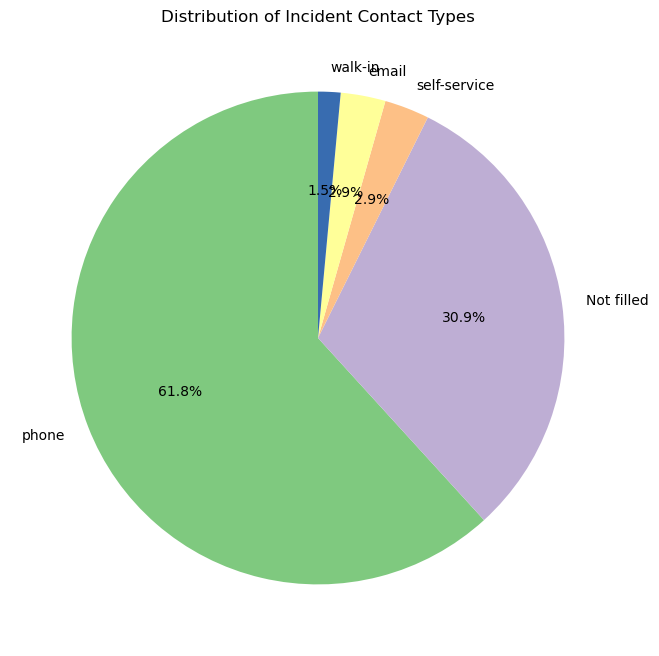

In [3]:
#Analysis of how incidents created through omnichannels
class_api.contacted_for_incident_analysis()


### Observation
From this analysis, it is evident that a majority of incident tickets, approximately 61.8%, were requested to be created via phone. However, concerning is the fact that agents neglected to fill in this field in nearly 31% of cases, which is not an encouraging observation.And by self 2.9 created their own tickets and by directly going to desk 2, through email 2.9 tickets were asked to create for their problems

### Analysis on ticket priorites  by category wise

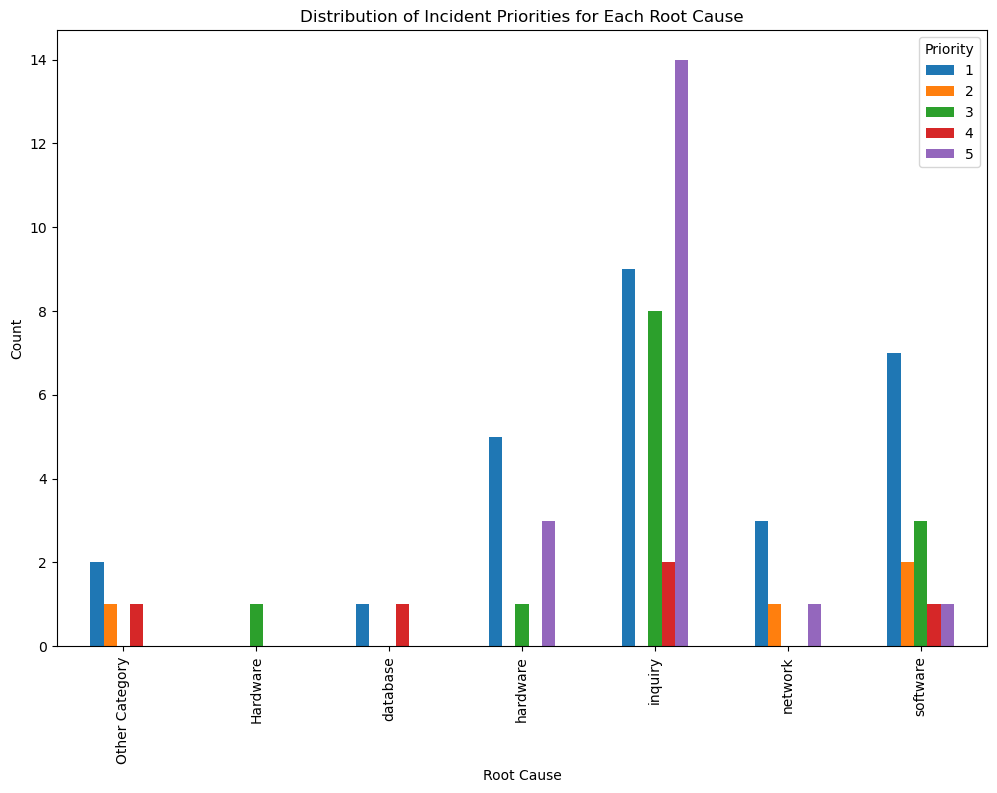

In [4]:
#Distribution of incident by priorities
class_api.priority_analysis()

### Observation
"Category" field plays a crucial role in assigning tickets, working alongside other relevant fields. In the "Inquiry" category, the majority of incident tickets are observed, with the highest number falling under the "5-Planning" priority, followed by "1-Critical" priority.
Upon closer analysis, it becomes evident that there are no high-priority tickets in the "Inquiry" category. Similarly, the "Network" category has no low-priority tickets, and the "Hardware" category lacks both high and low-priority tickets


### Analysis on ticket status for total incidents

Distribution of Incident Priorities:
7    27
2    20
1    13
3     7
6     1
Name: state, dtype: int64


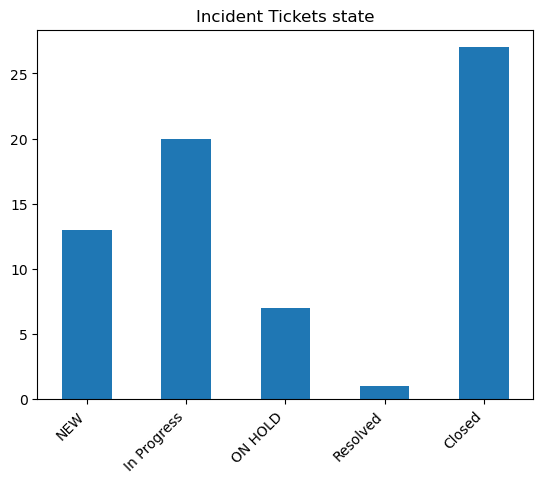

In [2]:
# analysis on ticket state for incident tickets
class_api.ticket_status_analysis()

### Observation
In the overall count of incident tickets, closed tickets have the highest number, indicating that a significant portion of issues has been resolved. Following that, tickets in progress come next, suggesting active work on addressing ongoing matters. New tickets, typically assigned to specific groups, fall in the middle range. These new tickets often transition to the "in progress" state once assigned. Resolved tickets have a lower count, as many of them proceed to the closed state shortly after being resolved.

### PART 3  Web Scraping

### Code approach:
The provided Python script is a web scraper designed to gather information about apartment listings from the Pararius website in Amsterdam. The script utilizes Selenium and BeautifulSoup libraries for web scraping. Here's an overview of how the code works:

The script defines a class named Pararius, encapsulating the functionality related to web scraping the Pararius website. The class has an __init__ method for initializing the object with the target URL and a headless mode option.

The get_page_source method is responsible for opening the specified URL using the Chrome WebDriver from Selenium. It waits for 10 seconds to allow dynamic content loading and retrieves the page source after JavaScript execution. The WebDriver is then closed.

The main method, scrape_listings, is tasked with extracting apartment listing data. It calls get_page_source to obtain the HTML content of the webpage. BeautifulSoup is used to parse the HTML, specifically targeting sections with the class listing-search-item, representing individual apartment listings. For each listing, relevant information such as title, location, price, number of rooms, and area is extracted. The extracted data is stored in a list of dictionaries.

An instance of the Pararius class is created, representing the Pararius website in Amsterdam. The scrape_listings method is invoked to obtain data about the apartment listings. The result is a DataFrame containing the gathered information.

The code aims to provide a structured approach to web scraping, allowing for the extraction of specific details from the Pararius website. However, it's crucial to note that web scraping is sensitive to changes in website structure, and any modifications to the site may require corresponding adjustments to the code for continued effectiveness. Additionally, users should be aware of and adhere to web scraping policies and terms of use to ensure ethical and legal compliance.


### Data usage
The data that was extarcted from pararius website gives data about apartment details offering for a flats. It gives full details of rooms, location of apartments, price and area

In [4]:
from analysis import web
pararius_scraper =web.Pararius(
    url="https://www.pararius.com/apartments/amsterdam?ac=1", headless=True)

# Scraping apartment data
apartment_data = pararius_scraper.scrape_listings()
apartment_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Flat             32 non-null     object
 1   Location         32 non-null     object
 2   Price            32 non-null     object
 3   Area             32 non-null     object
 4   Number of Rooms  32 non-null     object
dtypes: object(5)
memory usage: 1.4+ KB
None


,Flat,Location,Price,Area,Number of Rooms
0,Flat Sumatrastraat,1095 HN Amsterdam (Indische Buurt-Oost),"€1,650 per month",41 m²,2 rooms
1,Flat Amstel,1017 AD Amsterdam (Grachtengordel-Zuid),"€3,620 per month",80 m²,3 rooms
2,Flat Krooswijkhof 85,1082 PB Amsterdam (Buitenveldert-Oost),"€2,600 per month",130 m²,3 rooms
3,Flat Eerste Weteringdwarsstraat,1017 TM Amsterdam (De Weteringschans),"€2,450 per month",60 m²,3 rooms
4,Flat Okeghemstraat,1075 PJ Amsterdam (Willemspark),"€5,500 per month",189 m²,5 rooms
5,House Brouwersgracht 286 K,1013 HG Amsterdam (Haarlemmerbuurt),"€3,000 per month",70 m²,3 rooms
6,Flat De Genestetstraat,1054 AW Amsterdam (Helmersbuurt),Price on request,85 m²,2 rooms
7,Flat Rijnstraat,1079 GW Amsterdam (Rijnbuurt),"€2,250 per month",55 m²,2 rooms
8,Flat Rijnstraat 61 A2,1079 GW Amsterdam (Rijnbuurt),"€2,750 per month",78 m²,3 rooms
9,House Utrechtsedwarsstraat 78,1017 WH Amsterdam (De Weteringschans),"€4,250 per month",125 m²,4 rooms


## References
https://github.com/stefmolin/stock-analysis/tree/master/stock_analysis

https://public.opendatasoft.com/explore/?sort=modified

https://dev218227.service-now.com/navpage.do

https://openai.com/robots.txt

https://peps.python.org/pep-0008/

https://packaging.python.org/tutorials/packaging-projects/

https://www.pararius.com/apartments/amsterdam?ac=1

https://selenium-python.readthedocs.io/

https://pypi.org/project/black/
